# <h1 style='background:#7D8CC4; border:0; color:black;border-radius:40px 70px'><center>EDA OF EMOTION ANALYSIS</center></h1> 

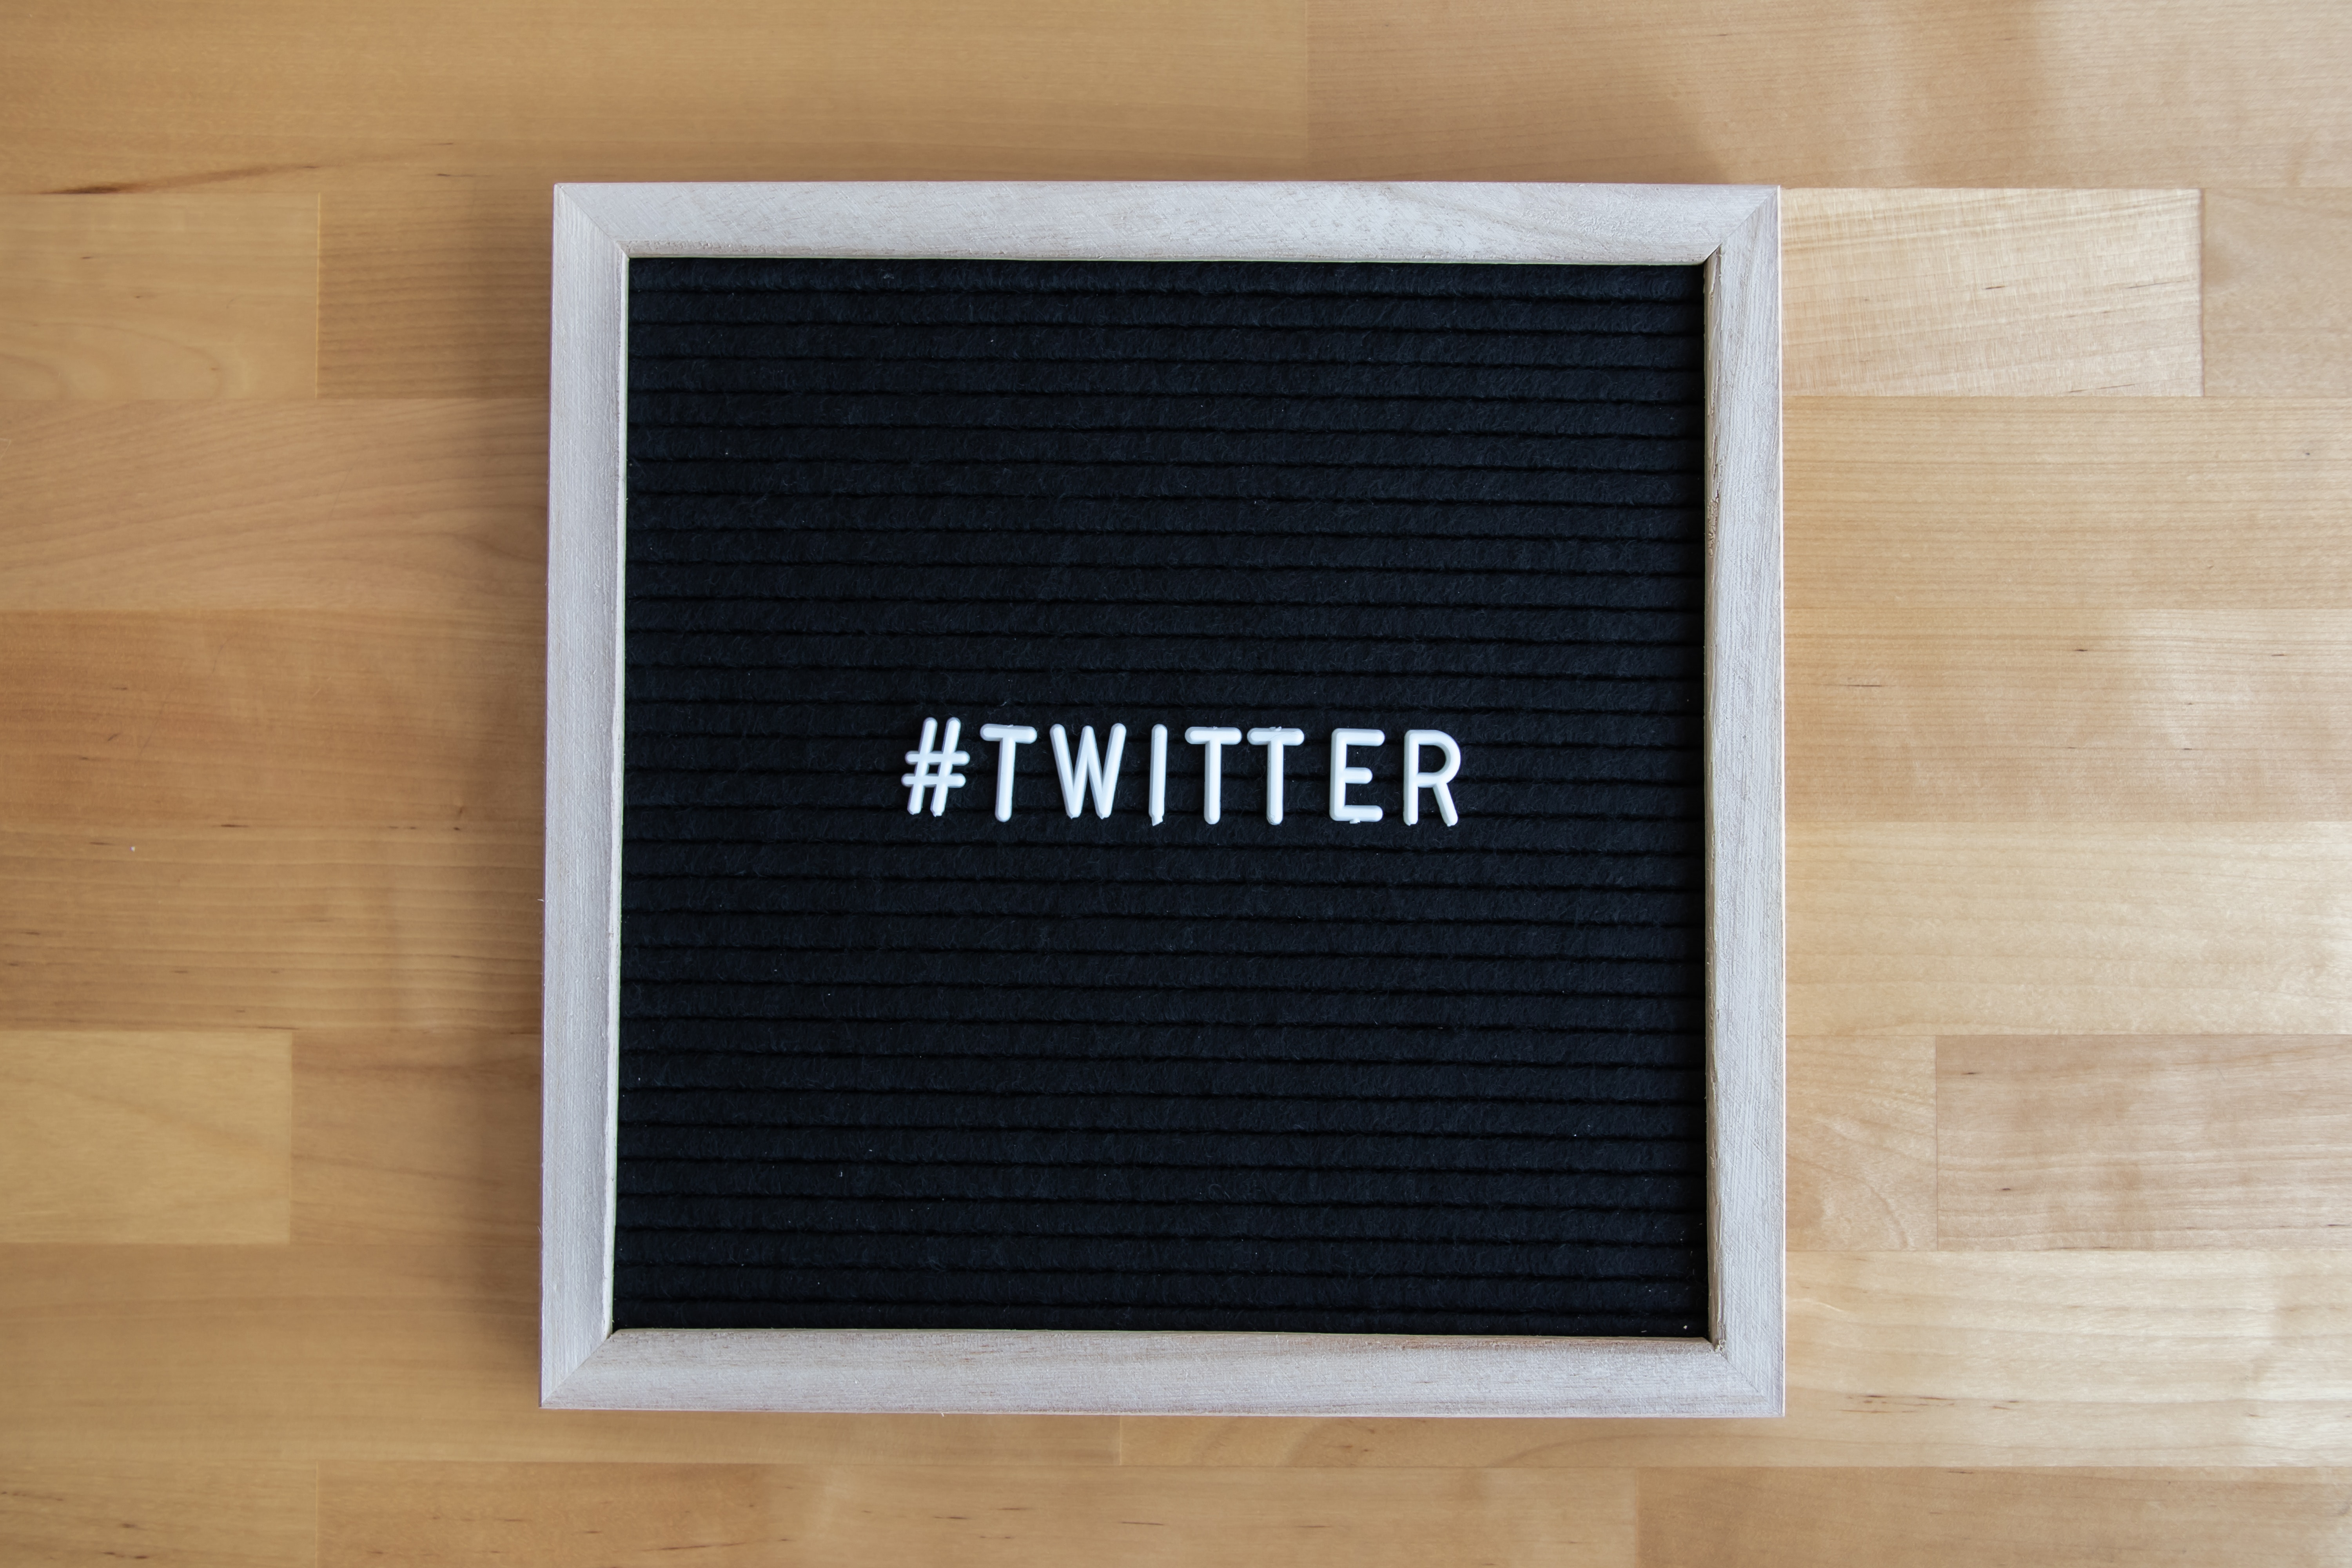

# <h1 style='background:#7D8CC4; border:0; color:black;border-radius:40px 70px'><center>IMPORTING LIBRARIES</center></h1> 

In [18]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import stopwords
Path("D:/libraries/EDA of Emotion dataset").mkdir(parents=True,exist_ok=True)
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

In [2]:
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
colors = ["#1B998B", "#A347FF", "#DECDF5", "#656176", "#726DA8", "#A0D2DB"]
sns.set_palette(sns.color_palette(colors))
matplotlib.rcParams['figure.figsize']=14,7

# <h1 style='background:#7D8CC4; border:0; color:black;border-radius:40px 70px'><center>IMPORTING DATASET</center></h1> 

In [3]:
test =pd.read_csv("D:/libraries/EDA of Emotion dataset/test.csv")
train=pd.read_csv('D:/libraries/EDA of Emotion dataset/training.csv')
validation = pd.read_csv('D:/libraries/EDA of Emotion dataset/validation.csv')

In [4]:
print(train.shape)
print(test.shape)
print(validation.shape)

(16000, 2)
(2000, 2)
(2000, 2)


### Create a columns for train

In [5]:
train_col ={0:"sadness",1:"joy",2:'love',3:'anger',4:'fear',5:'suprise'}
train['description']=train['label'].map(train_col)
train.head()
#train.drop(columns='validation',axis=1)
train.head()

,text,label,description
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


### null values in test,train and validation

In [6]:
for i  in train.columns:
    null_data=train[i].isna().sum()/len(train)
    if null_data>0:
         print("{} the null rate : {}%".format(i,round(null_data,2)))
            
for i in test.columns: 
    null_data2=test[i].isna().sum()/len(test)
    if null_data2>0:
        print('{} the null rate :{}'.format(i,round(null_data2,2)))

for i in validation.columns: 
    null_data3=validation[i].isna().sum()/len(validation)
    if null_data3>0:
        print('{} the null rate :{}'.format(i,round(null_data3,2)))
        

There is no null data present in the given dataset.

### Distribution of the labels in the training set

It’ll be informative to look at the distribution of the labels. This will also give us an idea of the imbalance in the dataset, if any.


In [7]:
train.columns

Index(['text', 'label', 'description'], dtype='object')

In [8]:
train['description'].value_counts(normalize=True)*100

joy        33.51250
sadness    29.16250
anger      13.49375
fear       12.10625
love        8.15000
suprise     3.57500
Name: description, dtype: float64

<AxesSubplot:xlabel='description', ylabel='count'>

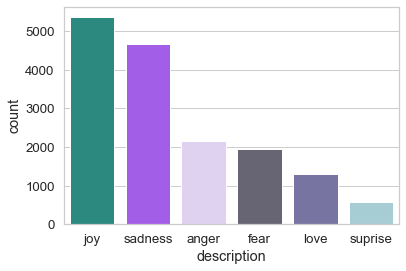

In [9]:
matplotlib.rcParams['figure.figsize']=14,7
sns.countplot(data=train,x='description',order=train['description'].value_counts(normalize=True).index)

About 33 percent of the tweets are joyful, followed by sad and angry tweets.


**Analyzing Text Statistics**

   - We can now do some statistical analysis to explore the fundamental characteristics of the text data. Some of the analyses which can be helpful are:
   - Text length analysis: calculating the length of the text, and
   - word frequency analysis: calculating the word count in the form of unigrams, bigrams and trigrams.



In [10]:
train.columns

Index(['text', 'label', 'description'], dtype='object')

In [11]:
train['text_label']=train['text'].astype(str).apply(len)
train['text_word_len']=train['text'].apply(lambda x:len(str(x).split()))

In [12]:
train.head()

,text,label,description,text_label,text_word_len
0,i didnt feel humiliated,0,sadness,23,4
1,i can go from feeling so hopeless to so damned...,0,sadness,108,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,48,10
3,i am ever feeling nostalgic about the fireplac...,2,love,92,18
4,i am feeling grouchy,3,anger,20,4


### Tweet length analysis

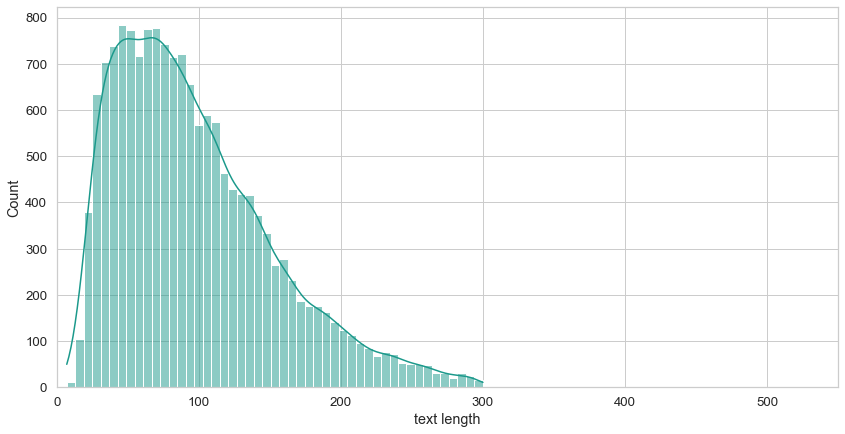

In [13]:
matplotlib.rcParams['figure.figsize']=14,7
sns.histplot(train['text_label'],kde=True)
plt.xlim([0,550])
plt.xlabel('text length')
plt.show()



The histogram above shows that the length of the tweet ranges from around 2 to 300 characters

### Tweet word count analysis

*Now let’s analyze the frequency of the words per tweet per class.*

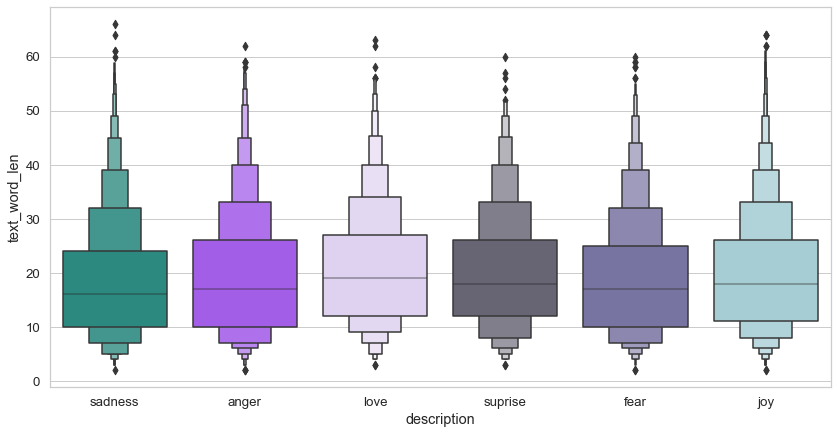

In [14]:
sns.boxenplot(x='description',y='text_word_len',data=train)
plt.show()

*As, we can see from above data  most of the tweet have a average length of 10-20 words per tweet.Also the tweet appear to have the more or less same emotion about the tweet.Hence, the tweet length isn't about the popularity indicator.*

### Distribution of categorial behaviour of the tweet 

In [23]:
# creating individual dataframe for the description  columns
sadness = train[train['label']==0]['text']
joy = train[train['label']==1]['text']
love = train[train['label']==2]['text']
anger = train[train['label']==3]['text']
fear = train[train['label']==4]['text']
surprise = train[train['label']==5]['text']



In [24]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [25]:
# calculating unigrmas, bigrams and trigrams for all given emotions

sad_unigrams = get_top_n_gram(sadness.values,(1,1),7)[2:]
joy_unigrams= get_top_n_gram(joy.values,(1,1),7)[2:]
love_unigrams= get_top_n_gram(love.values,(1,1),7)[2:]
anger_unigrams= get_top_n_gram(anger.values,(1,1),7)[2:]
fear_unigrams= get_top_n_gram(fear.values,(1,1),7)[2:]
surprise_unigrams= get_top_n_gram(surprise.values,(1,1),7)[2:]



sad_bigrams = get_top_n_gram(sadness.values,(2,2),7)[2:]
joy_bigrams= get_top_n_gram(joy.values,(2,2),7)[2:]
love_bigrams= get_top_n_gram(love.values,(2,2),7)[2:]
anger_bigrams= get_top_n_gram(anger.values,(2,2),7)[2:]
fear_bigrams= get_top_n_gram(fear.values,(2,2),7)[2:]
surprise_bigrams= get_top_n_gram(surprise.values,(2,2),7)[2:]


sad_trigrams = get_top_n_gram(sadness.values,(3,3),7)[2:]
joy_trigrams= get_top_n_gram(joy.values,(3,3),7)[2:]
love_trigrams= get_top_n_gram(love.values,(3,3),7)[2:]
anger_trigrams= get_top_n_gram(anger.values,(3,3),7)[2:]
fear_trigrams= get_top_n_gram(fear.values,(3,3),7)[2:]
surprise_trigrams= get_top_n_gram(surprise.values,(3,3),7)[2:]

## Visualizing the ngrams for some of the emotions

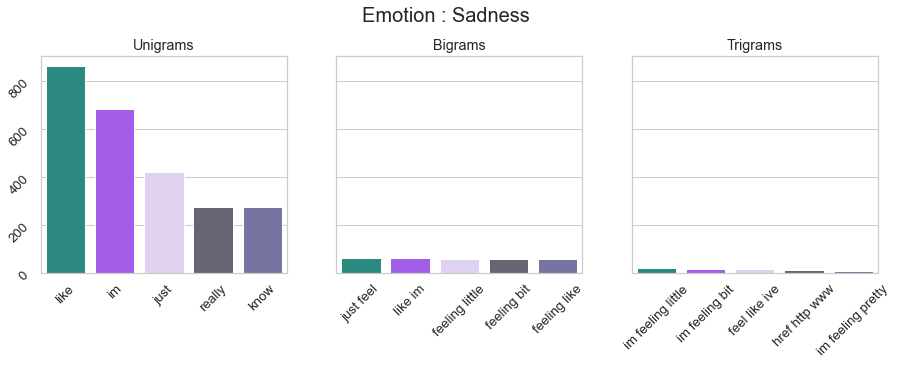

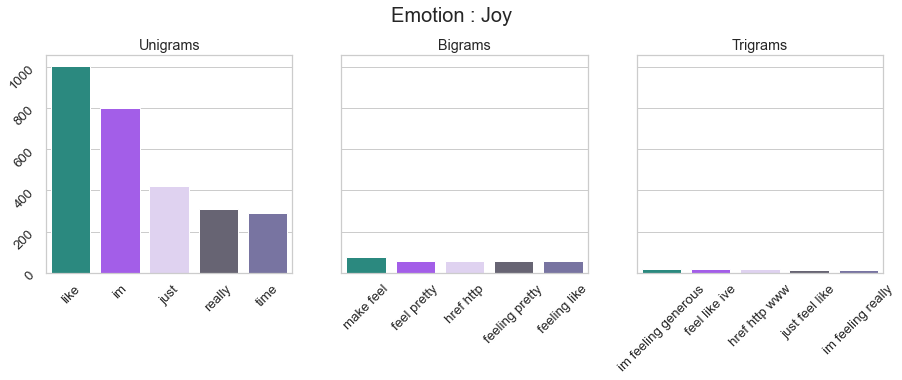

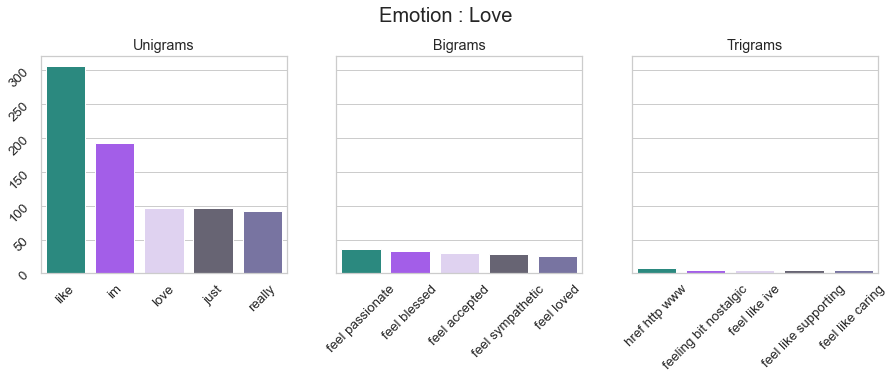

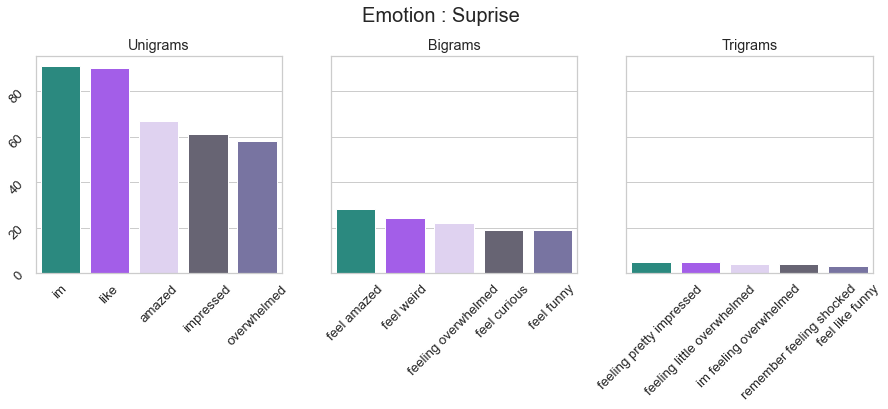

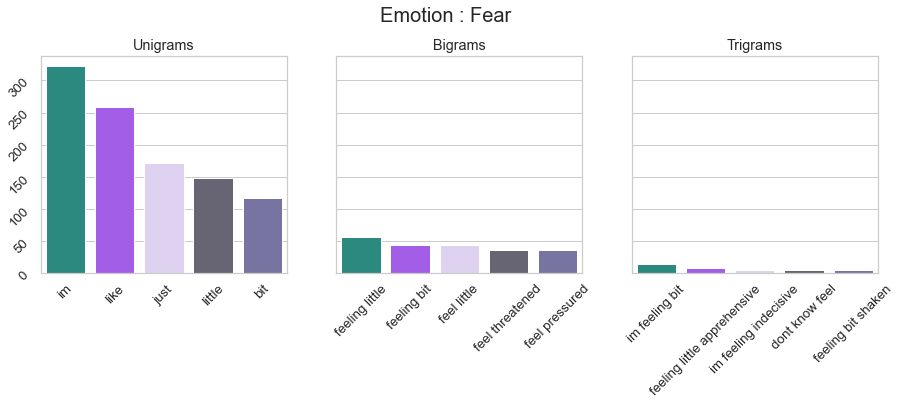

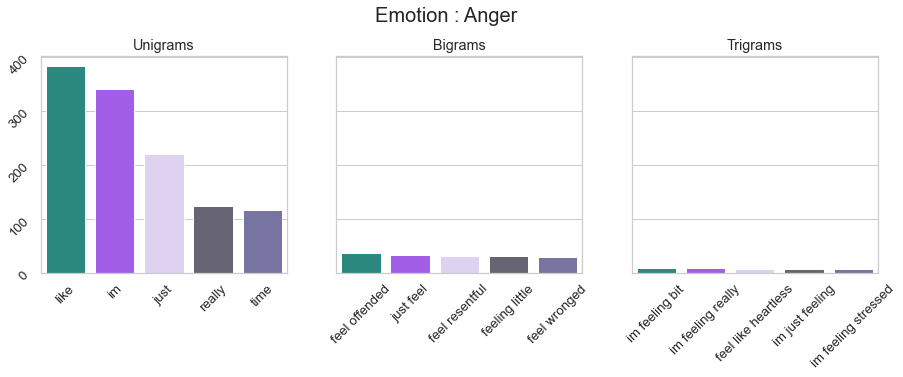

In [62]:
#visualization of sadness
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
fig.suptitle('Emotion : Sadness',size=20,y=1.05)


sns.barplot(x=list(dict(sad_unigrams).keys()), y=list(dict(sad_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(rotation=45)

sns.barplot(x=list(dict(sad_bigrams).keys()),y=list(dict(sad_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(rotation=45)

sns.barplot(x=list(dict(sad_trigrams).keys()),y=list(dict(sad_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(rotation=45)


# visualization of joy

fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
fig.suptitle('Emotion : Joy',size=20,y=1.05)

sns.barplot(x=list(dict(joy_unigrams).keys()),y=list(dict(joy_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(rotation=45)

sns.barplot(x=list(dict(joy_bigrams).keys()),y=list(dict(joy_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(rotation=45)

sns.barplot(x=list(dict(joy_trigrams).keys()),y=list(dict(joy_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(rotation=45)


# visualization of love

fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
fig.suptitle('Emotion : Love',size=20,y=1.05)

sns.barplot(x=list(dict(love_unigrams).keys()),y=list(dict(love_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(rotation=45)

sns.barplot(x=list(dict(love_bigrams).keys()),y=list(dict(love_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(rotation=45)

sns.barplot(x=list(dict(love_trigrams).keys()),y=list(dict(love_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(rotation=45)

# visualization of surprise

fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
fig.suptitle('Emotion : Suprise',size=20,y=1.05)

sns.barplot(x=list(dict(surprise_unigrams).keys()),y=list(dict(surprise_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(rotation=45)

sns.barplot(x=list(dict(surprise_bigrams).keys()),y=list(dict(surprise_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(rotation=45)

sns.barplot(x=list(dict(surprise_trigrams).keys()),y=list(dict(surprise_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(rotation=45)




# visualization of fear

fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
fig.suptitle('Emotion : Fear',size=20,y=1.05)

sns.barplot(x=list(dict(fear_unigrams).keys()),y=list(dict(fear_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(rotation=45)

sns.barplot(x=list(dict(fear_bigrams).keys()),y=list(dict(fear_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(rotation=45)

sns.barplot(x=list(dict(fear_trigrams).keys()),y=list(dict(fear_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(rotation=45)


# visualization of anger

fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
fig.suptitle('Emotion : Anger',size=20,y=1.05)

sns.barplot(x=list(dict(anger_unigrams).keys()),y=list(dict(anger_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(rotation=45)

sns.barplot(x=list(dict(anger_bigrams).keys()),y=list(dict(anger_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(rotation=45)

sns.barplot(x=list(dict(anger_trigrams).keys()),y=list(dict(anger_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(rotation=45)

# <h1 style='background:#7D8CC4; border:0; color:black;border-radius:40px 70px'><center>END</center></h1> 